# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [168]:
# Dependencies and Setup
import os
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as dt # to put a datestamp on the outputs
import json
from pprint import pprint
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
from api_keys import g_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [169]:
 #Create a random list of latitudes and longitudes
# np.random.uniform makes sure that all the numbers in the range get equal chance of getting picked

latitudes = np.random.uniform(-90, 90, size = 2000) # 500 random numbers from -90 to 90 deg latitude
longitudes = np.random.uniform(-180, 180, size = 2000) # 500 random numbers from -180 to 180 deg longitude

coordinates = list(zip(latitudes, longitudes))

In [170]:
# Nearby cities per latitude-longitude pair
cities = []

for coord in coordinates:
    lat, lon = coord
    cities.append(citipy.nearest_city(lat, lon))

In [171]:
# Set of cities
city_names = []
country = []

for city in cities:
    city_names.append(city.city_name) # loop through the city coordinates to get the city names
    country.append(city.country_code) # loop through the city coordinates to get the country codes
    
city_dict ={
    "latitude": latitudes,
    "longitude": longitudes,
    "city": city_names,
    "country": country
           }    

city_df = pd.DataFrame(city_dict)
city_df = city_df.drop_duplicates(["city","country"]) # drop city-country duplicates
city_df.head(10)

,latitude,longitude,city,country
0,-1.457365,-109.494369,puerto ayora,ec
1,25.093331,-29.601100,ponta do sol,cv
2,-0.604966,2.853581,port-gentil,ga
3,-19.114283,-124.081337,rikitea,pf
4,72.766954,-111.996872,yellowknife,ca
5,-53.284721,170.546666,bluff,nz
6,-35.418210,-54.500073,maldonado,uy
7,-83.613662,-75.236596,ushuaia,ar
8,28.425172,151.340833,hasaki,jp
9,-20.750400,14.037396,khorixas,na


## Generate Cities List

In [172]:
# Setting the units to imperial to get Fahrenheit reading
settings = {"units": "Imperial", "appid": g_key}
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [173]:
lat = list(np.arange(-90,90.01,0.01))
long = list(np.arange(-180,180.01,0.01))

In [174]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
# Counter to go through data
record = 0
sets = 1
# Create DataFrame
weather_df = pd.DataFrame({"City": cities})
weather_df["Cloudiness"] = ""
weather_df["Country"] = ""
weather_df["Date"] = ""
weather_df["Humidity"] = ""
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Max Temp"] = ""
weather_df["Wind Speed"] = ""
# Interate through Cities and retrieve data
print("Beginning Data Retrieval")
print("-----------------------------")
for index, row in weather_df.iterrows():
    city = row["City"]
    query_url = url + "&q=" + city
    #query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        print (query_url)
        weather_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index, "Country"] = response["sys"]["country"]
        weather_df.loc[index, "Date"] = response["dt"]
        weather_df.loc[index, "Humidity"] = response["main"]["humidity"]
        weather_df.loc[index, "Latitude"] = response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = response["coord"]["lon"]
        weather_df.loc[index, "Max Temp"] = response["main"]["temp_max"]
        weather_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        record += 1
    except:
        print("City not found...skipping.")
        print (query_url)
        weather_df.loc[index, "Cloudiness"] = ""
        weather_df.loc[index, "Country"] = ""
        weather_df.loc[index, "Date"] = ""
        weather_df.loc[index, "Humidity"] = ""
        weather_df.loc[index, "Latitude"] = ""
        weather_df.loc[index, "Longitude"] = ""
        weather_df.loc[index, "Max Temp"] = ""
        weather_df.loc[index, "Wind Speed"] = ""
        record = record + 1
       #time.sleep(1)
    if record == 50:
        record = 0
        sets = sets + 1
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | punta arenas.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=punta arenas
Processing Record 1  of Set 1 | gushikawa.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=gushikawa
Processing Record 2  of Set 1 | qaanaaq.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=qaanaaq
Processing Record 3  of Set 1 | taolanaro.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=taolanaro
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=taolanaro
Processing Record 4  of Set 1 | nikolskoye.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=nikolskoye
Processing Record 5  

Processing Record 48  of Set 1 | richards bay.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=richards bay
Processing Record 49  of Set 1 | barra do garcas.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=barra do garcas
Processing Record 0  of Set 2 | majene.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=majene
Processing Record 1  of Set 2 | waingapu.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=waingapu
Processing Record 2  of Set 2 | shimoda.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=shimoda
Processing Record 3  of Set 2 | pangnirtung.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=pangnirtung
Processing Record 4  of Set 2 | mataura.
http://api.

Processing Record 49  of Set 2 | port alfred.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=port alfred
Processing Record 0  of Set 3 | hobyo.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=hobyo
Processing Record 1  of Set 3 | ugoofaaru.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=ugoofaaru
Processing Record 2  of Set 3 | upernavik.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=upernavik
Processing Record 3  of Set 3 | cap-aux-meules.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=cap-aux-meules
Processing Record 4  of Set 3 | graaff-reinet.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=graaff-reinet
Processing Record 5  of Set 3 | yeletskiy.
http:/

Processing Record 49  of Set 3 | khatanga.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=khatanga
Processing Record 0  of Set 4 | amderma.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=amderma
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=amderma
Processing Record 1  of Set 4 | matiari.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=matiari
Processing Record 2  of Set 4 | jamestown.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=jamestown
Processing Record 3  of Set 4 | nadym.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=nadym
Processing Record 4  of Set 4 | matay.
http://api.openweathermap.org/data/2.5/weather?units=Imperia

Processing Record 0  of Set 5 | ahipara.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=ahipara
Processing Record 1  of Set 5 | abha.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=abha
Processing Record 2  of Set 5 | iqaluit.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=iqaluit
Processing Record 3  of Set 5 | tommot.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=tommot
Processing Record 4  of Set 5 | adrar.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=adrar
Processing Record 5  of Set 5 | port moresby.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=port moresby
Processing Record 6  of Set 5 | talnakh.
http://api.openweathermap.org/data/2.5/weather?un

Processing Record 0  of Set 6 | kamenka.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kamenka
Processing Record 1  of Set 6 | qaqortoq.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=qaqortoq
Processing Record 2  of Set 6 | mount isa.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=mount isa
Processing Record 3  of Set 6 | vilyuysk.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=vilyuysk
Processing Record 4  of Set 6 | terrace.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=terrace
Processing Record 5  of Set 6 | belushya guba.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=belushya guba
City not found...skipping.
http://api.openweathermap.org/data/2.5/we

Processing Record 1  of Set 7 | salinopolis.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=salinopolis
Processing Record 2  of Set 7 | fortuna.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=fortuna
Processing Record 3  of Set 7 | waipawa.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=waipawa
Processing Record 4  of Set 7 | paita.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=paita
Processing Record 5  of Set 7 | sinnamary.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=sinnamary
Processing Record 6  of Set 7 | kingsland.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kingsland
Processing Record 7  of Set 7 | lodja.
http://api.openweathermap.org/data/2.

Processing Record 2  of Set 8 | khandyga.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=khandyga
Processing Record 3  of Set 8 | kropotkin.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kropotkin
Processing Record 4  of Set 8 | ancud.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=ancud
Processing Record 5  of Set 8 | chunhuhub.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=chunhuhub
Processing Record 6  of Set 8 | atbasar.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=atbasar
Processing Record 7  of Set 8 | fort wellington.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=fort wellington
Processing Record 8  of Set 8 | burnie.
http://api.openweathermap.

Processing Record 3  of Set 9 | trinidad.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=trinidad
Processing Record 4  of Set 9 | pacho.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=pacho
Processing Record 5  of Set 9 | maymanak.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=maymanak
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=maymanak
Processing Record 6  of Set 9 | jian.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=jian
Processing Record 7  of Set 9 | kaduqli.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kaduqli
Processing Record 8  of Set 9 | namatanai.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 1  of Set 10 | brainerd.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=brainerd
Processing Record 2  of Set 10 | longyearbyen.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=longyearbyen
Processing Record 3  of Set 10 | gasa.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=gasa
Processing Record 4  of Set 10 | kambove.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kambove
Processing Record 5  of Set 10 | avera.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=avera
Processing Record 6  of Set 10 | penalva.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=penalva
Processing Record 7  of Set 10 | chicama.
http://api.openweathermap.org/data/2.5

Processing Record 0  of Set 11 | karangasem.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=karangasem
Processing Record 1  of Set 11 | kizukuri.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kizukuri
Processing Record 2  of Set 11 | pontarlier.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=pontarlier
Processing Record 3  of Set 11 | rafsanjan.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=rafsanjan
Processing Record 4  of Set 11 | kazalinsk.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kazalinsk
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=kazalinsk
Processing Record 5  of Set 11 | dumas.
http://api.openweathermap.org/dat

Processing Record 48  of Set 11 | siverek.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=siverek
Processing Record 49  of Set 11 | pumiao.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=pumiao
Processing Record 0  of Set 12 | katsuura.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=katsuura
Processing Record 1  of Set 12 | ukiah.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=ukiah
Processing Record 2  of Set 12 | bondo.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=bondo
Processing Record 3  of Set 12 | gobabis.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=gobabis
Processing Record 4  of Set 12 | baghdad.
http://api.openweathermap.org/data/2.5/weather

Processing Record 0  of Set 13 | san lorenzo.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=san lorenzo
Processing Record 1  of Set 13 | mizan teferi.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=mizan teferi
Processing Record 2  of Set 13 | malatya.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=malatya
Processing Record 3  of Set 13 | cao bang.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=cao bang
Processing Record 4  of Set 13 | berdyuzhye.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=berdyuzhye
City not found...skipping.
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7a3380d52bb24a5561eb02a3c25caa20&q=berdyuzhye
Processing Record 5  of Set 13 | atar.
http://api.openweathermap.org

In [175]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'], unit = 's')

In [176]:
# Save the result to a csv file
weather_df.to_csv("vacation.csv")
# Count of the data in the dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,punta arenas,75,CL,2019-09-30 03:57:29,55,-53.16,-70.91,37.4,17.22
1,gushikawa,75,JP,2019-09-30 03:57:29,70,26.35,127.87,87.8,14.99
2,qaanaaq,91,GL,2019-09-30 03:57:29,67,77.48,-69.36,30.65,9.82
3,taolanaro,,,NaT,,,,,
4,nikolskoye,75,RU,2019-09-30 03:57:29,93,59.7,30.79,52,4.47


In [177]:
# Count of the data in the dataframe
weather_df.count()

City          612
Cloudiness    612
Country       612
Date          557
Humidity      612
Latitude      612
Longitude     612
Max Temp      612
Wind Speed    612
dtype: int64

In [178]:
weather_df.dtypes

City                  object
Cloudiness            object
Country               object
Date          datetime64[ns]
Humidity              object
Latitude              object
Longitude             object
Max Temp              object
Wind Speed            object
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [179]:
weather_df.replace("", np.nan, inplace = True)
weather_df = weather_df.dropna()
weather_df.head()
print(f"There are {len(weather_df)} cities included in the weather analyses.")

There are 557 cities included in the weather analyses.


In [180]:
#Choose ggplot as style for plots
plt.style.use('ggplot')

# Size of plots
fig_size = plt.rcParams["figure.figsize"] # get current size
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size # customise plot size

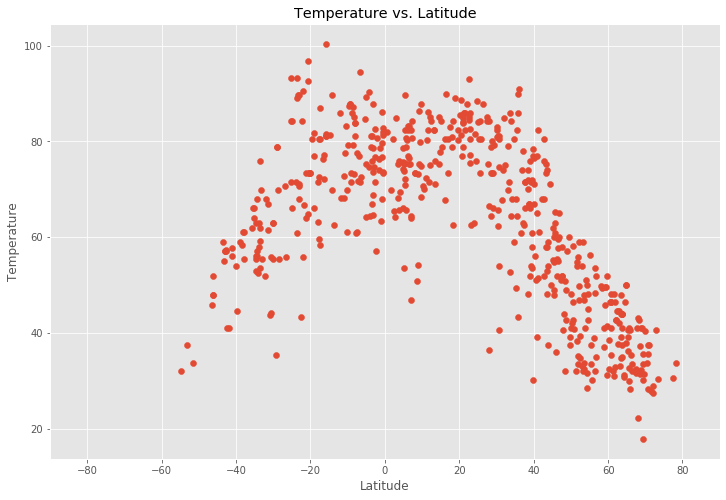

In [181]:
# Latitude vs Temperature
plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.xlim(-90,90)
plt.title("Temperature vs. Latitude")

# Save image
plt.savefig("weather_df{}.png")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

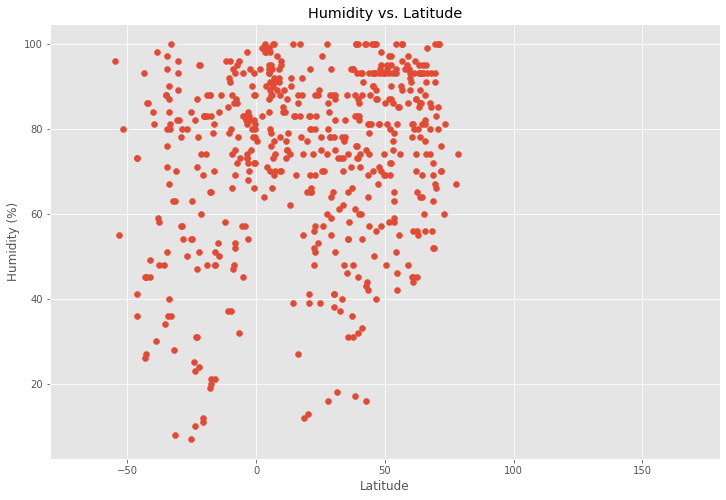

In [182]:
# Latitude vs Humidity

# Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80,180)
plt.title("Humidity vs. Latitude")
# Save image
plt.savefig("weather_df{}.png")
plt.show()

#### Latitude vs. Humidity Plot

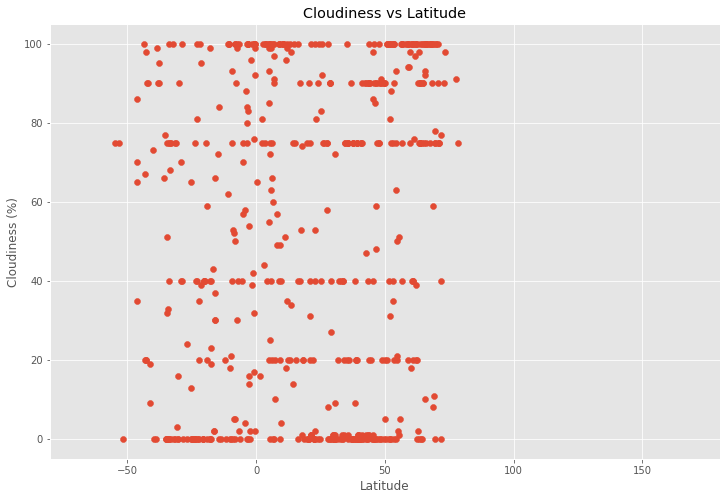

In [183]:
# Latitude vs Cloudliness  

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80,180)
plt.title("Cloudiness vs Latitude")

# Save image
plt.savefig("weather_df{}.png")
plt.show()

#### Latitude vs. Cloudiness Plot

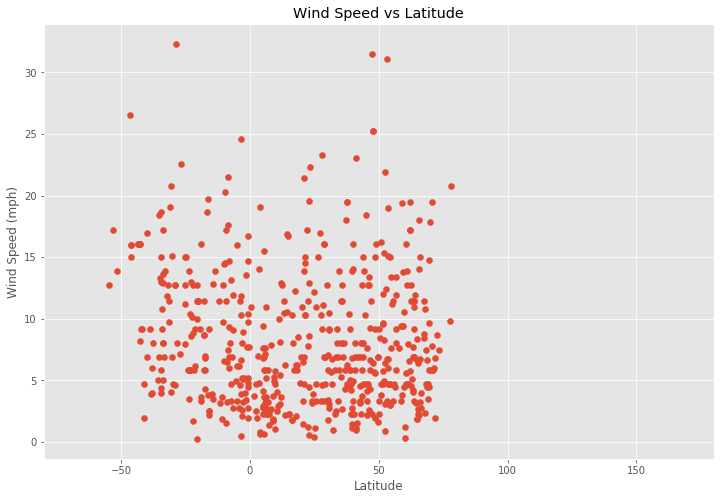

In [185]:
# Latitude vs Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,180)
plt.title("Wind Speed vs Latitude")
# Save image
plt.savefig("weather_df{}.png")
plt.show()

#### Latitude vs. Wind Speed Plot

R squard: -0.5044410322586176


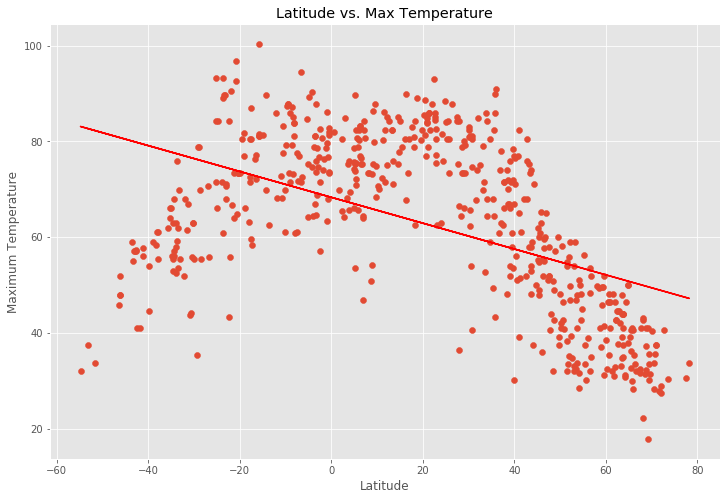

In [186]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = weather_df['Latitude']
y_values = weather_df['Max Temp']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Max Temperature")

# Save image
print(f"R squard: {rvalue}")
plt.savefig("weather_df{}.png")
plt.show()

## Linear Regression

In [187]:
North_df = weather_df.loc[(weather_df['Latitude']<=0)]
North_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,punta arenas,75.0,CL,2019-09-30 03:57:29,55.0,-53.16,-70.91,37.40,17.22
8,kruisfontein,100.0,ZA,2019-09-30 03:57:30,84.0,-34.00,24.73,52.61,10.83
12,atuona,21.0,PF,2019-09-30 03:57:30,80.0,-9.80,-139.03,79.25,20.27
13,east london,75.0,ZA,2019-09-30 03:57:30,100.0,-33.02,27.91,55.40,13.87
15,humberto de campos,14.0,BR,2019-09-30 03:57:30,83.0,-2.60,-43.46,76.73,8.93


In [191]:
# Count of the data in the dataframe
North_df.count()

City          178
Cloudiness    178
Country       178
Date          178
Humidity      178
Latitude      178
Longitude     178
Max Temp      178
Wind Speed    178
dtype: int64

In [192]:
North_df.dtypes

City                  object
Cloudiness           float64
Country               object
Date          datetime64[ns]
Humidity             float64
Latitude             float64
Longitude            float64
Max Temp             float64
Wind Speed           float64
dtype: object

In [193]:
North_df.replace("", np.nan, inplace = True)
North_df = North_df.dropna()
North_df.head()
print(f"There are {len(North_df)} cities included in the weather analyses.")

There are 178 cities included in the weather analyses.


In [194]:
#Choose ggplot as style for plots
plt.style.use('ggplot')

# Size of plots
fig_size = plt.rcParams["figure.figsize"] # get current size
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size # customise plot size

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.6488576927023194


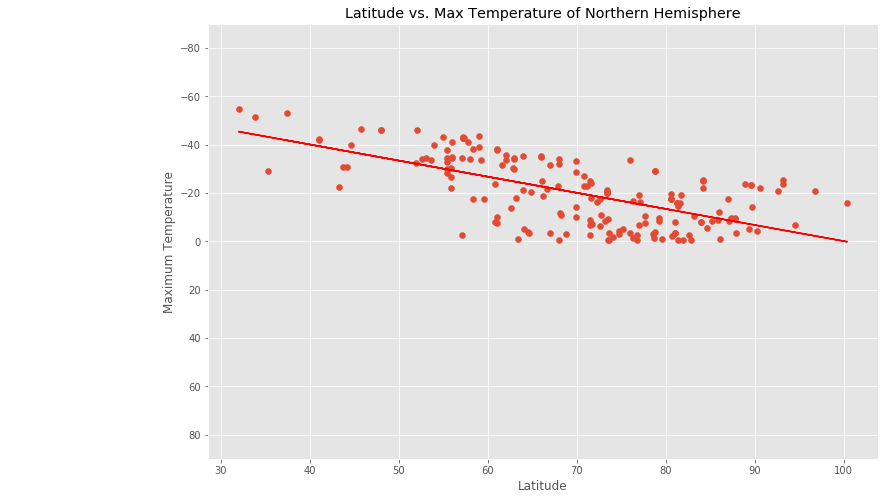

In [195]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = North_df['Max Temp']
y_values = North_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Max Temperature of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("North_df{}.png")
plt.show()

  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.20978586191899112


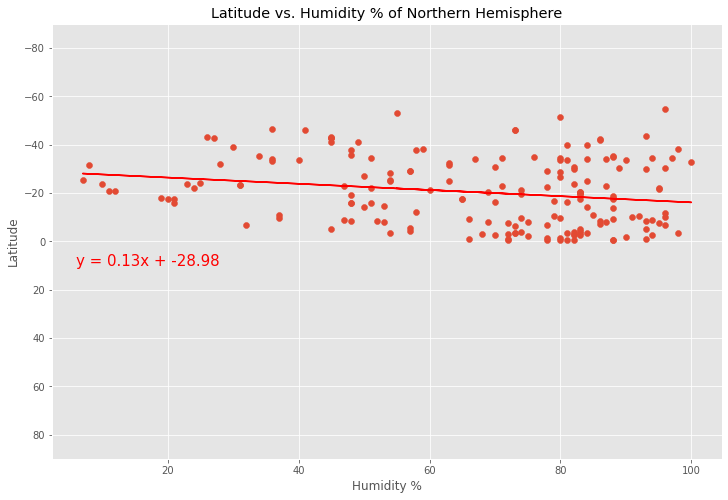

In [196]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = North_df['Humidity']
y_values = North_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.title("Latitude vs. Humidity % of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("North_df{}.png")
plt.show()

R squard: 0.08549023350552724


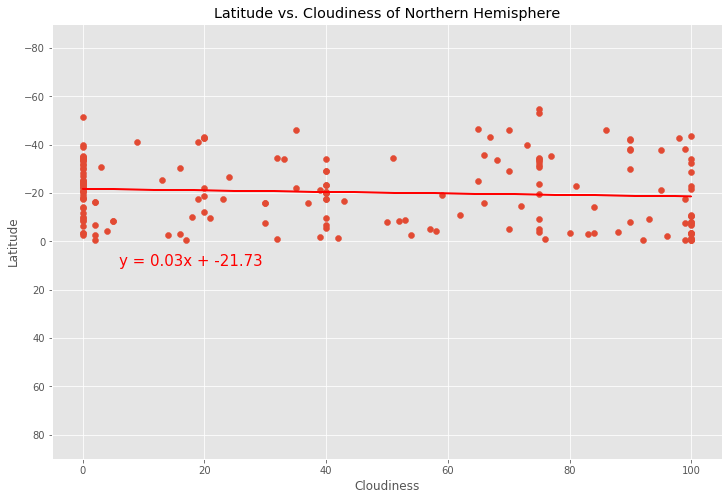

In [197]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = North_df['Cloudiness']
y_values = North_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Latitude vs. Cloudiness of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("North_df{}.png")
plt.show()

R squard: -0.29334391748820077


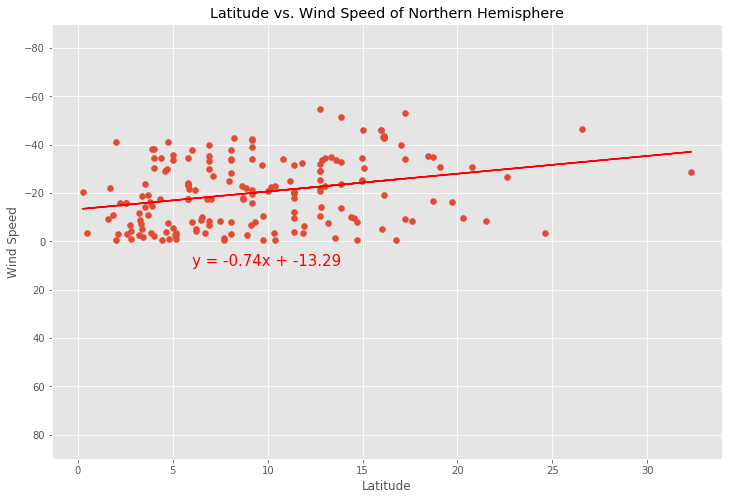

In [198]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = North_df['Wind Speed']
y_values = North_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed of Northern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("North_df{}.png")
plt.show()

In [199]:
South_df = weather_df.loc[(weather_df['Latitude']>=0)]
South_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
1,gushikawa,75.0,JP,2019-09-30 03:57:29,70.0,26.35,127.87,87.80,14.99
2,qaanaaq,91.0,GL,2019-09-30 03:57:29,67.0,77.48,-69.36,30.65,9.82
4,nikolskoye,75.0,RU,2019-09-30 03:57:29,93.0,59.70,30.79,52.00,4.47
6,albany,1.0,US,2019-09-30 03:56:58,75.0,42.65,-73.75,52.00,3.36
9,chapais,90.0,CA,2019-09-30 03:57:30,74.0,49.78,-74.86,37.40,1.61


In [203]:
# Count of the data in the dataframe
South_df.count()

City          379
Cloudiness    379
Country       379
Date          379
Humidity      379
Latitude      379
Longitude     379
Max Temp      379
Wind Speed    379
dtype: int64

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [204]:
South_df.dtypes

City                  object
Cloudiness           float64
Country               object
Date          datetime64[ns]
Humidity             float64
Latitude             float64
Longitude            float64
Max Temp             float64
Wind Speed           float64
dtype: object

In [205]:
South_df.replace("", np.nan, inplace = True)
South_df = South_df.dropna()
South_df.head()
print(f"There are {len(South_df)} cities included in the weather analyses.")

There are 379 cities included in the weather analyses.


In [206]:
#Choose ggplot as style for plots
plt.style.use('ggplot')

# Size of plots
fig_size = plt.rcParams["figure.figsize"] # get current size
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size # customise plot size

R squard: -0.8100032085525091


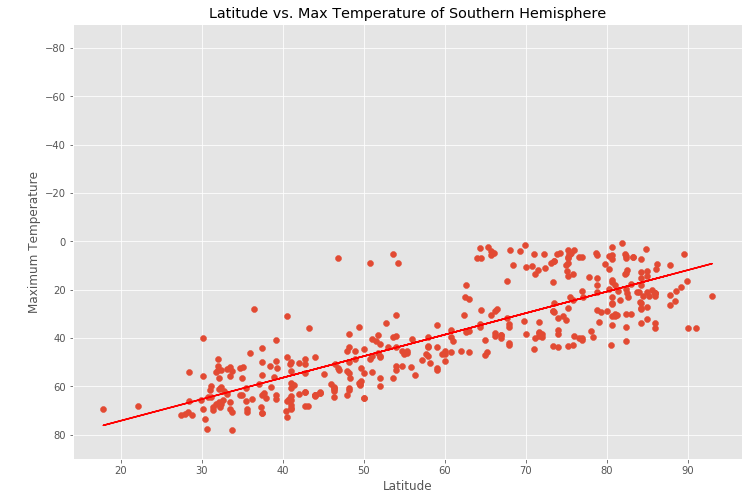

In [207]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = South_df['Max Temp']
y_values = South_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title("Latitude vs. Max Temperature of Southern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("South_df{}.png")
plt.show()

R squard: -0.0020322515344701223


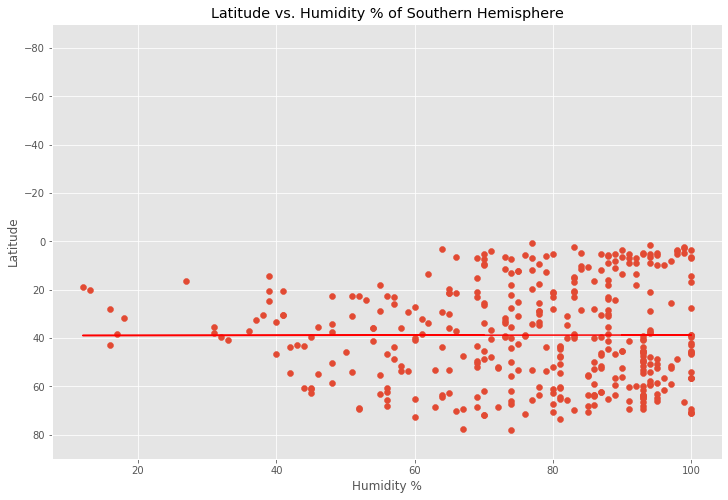

In [208]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = South_df['Humidity']
y_values = South_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.title("Latitude vs. Humidity % of Southern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("South_df{}.png")
plt.show()

R squard: 0.13842095886258085


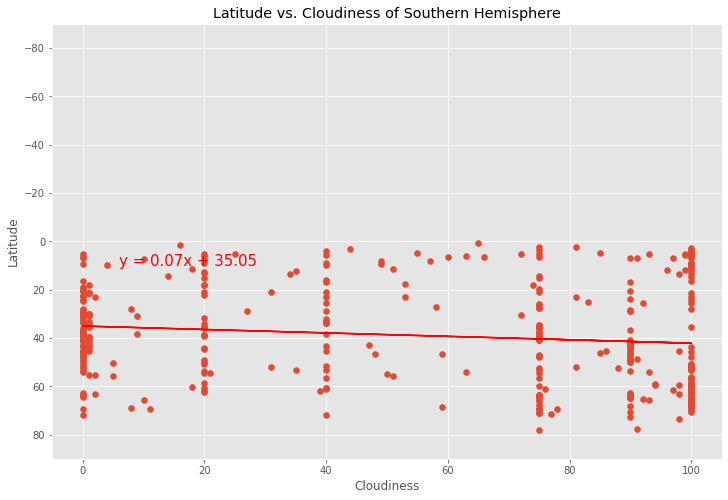

In [209]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = South_df['Cloudiness']
y_values = South_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title("Latitude vs. Cloudiness of Southern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("South_df{}.png")
plt.show()

R squard: 0.15135810203111277


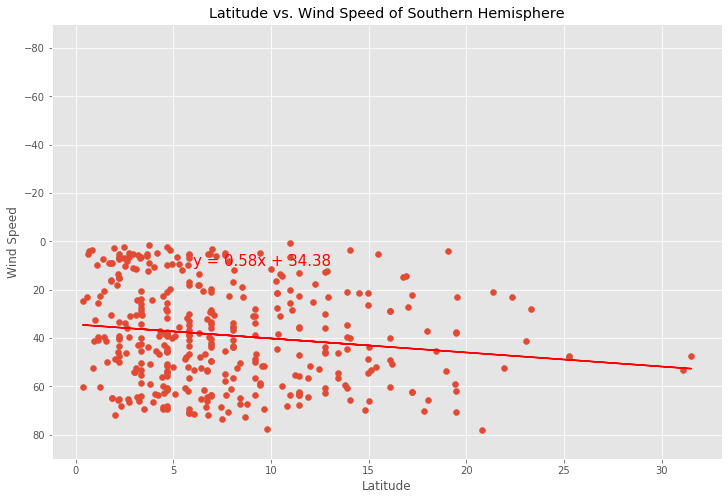

In [210]:
#plt.scatter(weather_df["Latitude"], weather_df["Max Temp"])
x_values = South_df['Wind Speed']
y_values = South_df['Latitude']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs. Wind Speed of Southern Hemisphere")
plt.ylim(90,-90)

# Save image
print(f"R squard: {rvalue}")
plt.savefig("South_df{}.png")
plt.show()